In [67]:
from sqlalchemy.sql import text
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [70]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [73]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [74]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [75]:
# reflect an existing database into a new model
Base = automap_base()


In [76]:

# reflect the tables
Base.prepare(autoload_with=engine)


In [77]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [78]:
# View all of the classes that automap found
# Create the inspector and connect it to the engine
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [79]:
# View all of the classes that automap found
# Using the inspector to print the column names within the 'Measurement' table and its types
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [80]:
# View all of the classes that automap found
# Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [81]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [82]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation (Measurement) Analysis

In [83]:
session.query(func.max(Measurement.date)).first()


('2017-08-23',)

In [84]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

In [ ]:
#### Important Note! 
# Since Sqlite does not support a date column type, but SQLAlchemy will allow you to work with dates in the iso format. 
# [sqlite dates](http://docs.sqlalchemy.org/en/latest/dialects/sqlite.html)
# We imported dateline as dt

In [85]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# date 12 months ago from '2017-08-23'
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in the data set: '2017-08-23'
previous_twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
previous_twelve_months


datetime.date(2016, 8, 23)

In [89]:
# Perform a query to retrieve the dates and precipitation scores
sel = [Measurement.date,
       Measurement.prcp]

past_12_months_prcp = session.query(*sel).\
    filter(Measurement.date >= previous_twelve_months).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
past_12_months_prcp


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [137]:
past_12_months_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= previous_twelve_months).all()
past_12_months_prcp


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [93]:

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(past_12_months_prcp, columns=['date', 'precipitation'])
prcp_df.head()


,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [96]:

# Sort the dataframe by date
sort_prcp_df = prcp_df.sort_values("date")
prcp_df.head()


,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


Text(0, 0.5, 'Inches')

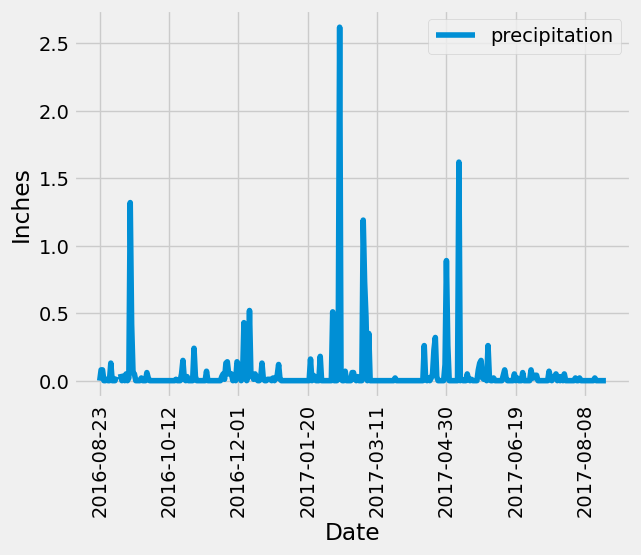

In [149]:
sort_prcp_df.plot(x= 'date',  y= 'precipitation', rot = 90)
plt.xlabel('Date')
plt.ylabel('Inches')


In [162]:
# Use Pandas to print the summary statistics for the precipitation data.
sort_prcp_df .describe()


,precipitation
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [98]:
# View all of the classes that automap found
# Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [146]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(Station).distinct().count()
print(total_stations)


9


In [158]:
stations_listing = session.query(Measurement.station).distinct().all()

stations_listing


[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [138]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations_list = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(
        func.count(Measurement.station).desc()).all()
stations_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [145]:
# From the above query result, station id 'USC00519281' has the greatest number of observations
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_highest_average_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
lowest_highest_average_temp


[(54.0, 85.0, 71.66378066378067)]

In [159]:
# Perform a query to retrieve the previous 12 months of temperature observation (TOBS) data from the station that has the greatest number of observations
past_12_months_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date >= previous_twelve_months).all()
past_12_months_temp


[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [165]:
temp_df = pd.DataFrame(past_12_months_temp, columns=['date','tobs'])
temp_df.head()



,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


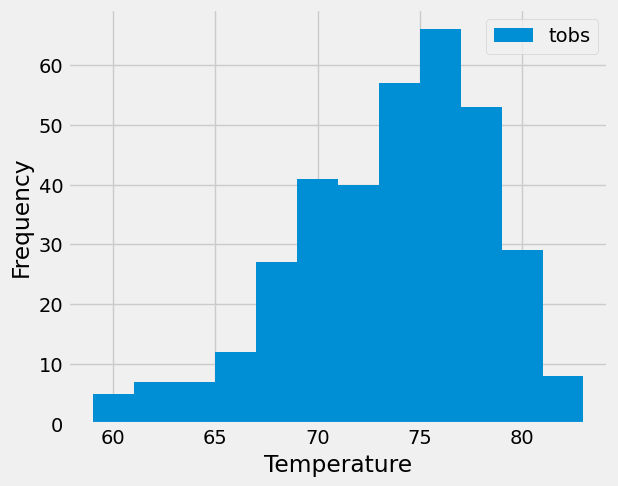

In [167]:
temp_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel('Temperature')
plt.show()





# Close session

In [ ]:
# Close Session
session.close()